**REGRESIÓN LINEAL**

*presentado por:*

Andrés Felipe Alvarez Cortes

Juan David Oquendo Usuga

Camila Suárez Osorio

In [24]:
#Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import SGDRegressor

In [25]:
#Carga base de datos
df=pd.read_csv('bmi.csv')
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [26]:
#Separar variables (Independiente y Dependiente)
X = df[['Height', 'Weight']]
y = df['Index']   # tu target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


print ('Varible x: ', x)
print('Variable y: ', y)

Varible x:       Height  Weight
0       174      96
1       189      87
2       185     110
3       195     104
4       149      61
..      ...     ...
495     150     153
496     184     121
497     141     136
498     150      95
499     173     131

[500 rows x 2 columns]
Variable y:  0      4
1      2
2      4
3      3
4      3
      ..
495    5
496    4
497    5
498    5
499    5
Name: Index, Length: 500, dtype: int64


In [27]:
# Import StandardScaler.
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler.
scaler = StandardScaler()

# Fit and transform training data.
X_train_scaled = scaler.fit_transform(X_train)

# Also transform test data.
X_test_scaled = scaler.transform(X_test)

In [43]:
# SGDRegressor simula descenso gradiente como tu función manual
model = SGDRegressor(
    max_iter=1,          # una iteración por época
    eta0=0.001,          # learning rate
    learning_rate="constant",
    penalty=None,
    fit_intercept=True,
    warm_start=True      # permite seguir entrenando
)

epochs = 5000
costs = []

for epoch in range(epochs):
    model.partial_fit(X_train_scaled, y_train)  # entrenamiento por época
    
    # calcular costo (MSE) igual que tu código manual
    y_hat = model.predict(X_train_scaled)
    loss = np.mean((y_hat - y_train)**2)
    costs.append(loss)

print("Pesos (w):", model.coef_)
print("Bias (b):", model.intercept_)


Pesos (w): [-0.5959541   1.11554192]
Bias (b): [3.73665469]


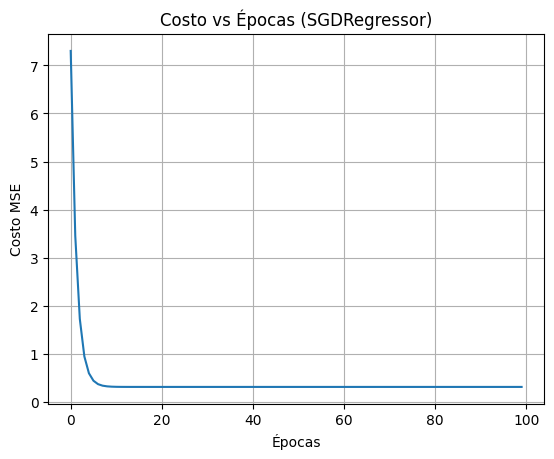

In [ ]:
plt.plot(costs)
plt.xlabel("Épocas")
plt.ylabel("Costo MSE")
plt.title("Costo vs Épocas")
plt.grid()
plt.show()


In [8]:
# Import LinearRegression.
from sklearn.linear_model import LinearRegression


# Instantiate linear regression model.
model = LinearRegression()

In [9]:
# Fit the model to the training data.
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# Make predictions on the testing data.
y_prediction = model.predict(X_test_scaled)

In [37]:
#Calculo métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

print("MSE:", mean_squared_error(y_test, y_prediction))
print("MAE:", mean_absolute_error(y_test, y_prediction))
print("R2:", r2_score(y_test, y_prediction))
print('Pearson',  pearsonr(y_test, y_prediction))
print("MAPE", np.mean(np.abs((y_test - y_prediction) / y_test)) * 100)

MSE: 0.3362022483992543
MAE: 0.4670723963132595
R2: 0.7981858164360079
Pearson PearsonRResult(statistic=np.float64(0.9015825750448764), pvalue=np.float64(1.933710460077309e-37))
MAPE inf


iNTERPRETACIÓN MÉTRICAS:

MSE:Esto indica que, en promedio, el modelo comete errores pequeños, y los errores grandes son poco frecuentes (porque MSE penaliza errores grandes).

MAE:En promedio, las predicciones se equivocan menos de medio punto. Esto se considera un buen desempeño en un problema de regresión simple.

R^2: El 79.8 % de la variabilidad del índice (Index) se explica por Height y Weight. El modelo tiene un buen poder explicativo.

PEARSON: Hay una correlación muy alta entre las predicciones y los valores reales.

MAPE:

In [38]:
# Datos del nuevo paciente (ejemplo)
nuevo_paciente = np.array([[170, 70]])  # Height=170 cm, Weight=70 kg

# Escalar con el MISMO scaler del entrenamiento
nuevo_paciente_scaled = scaler.transform(nuevo_paciente)

# Predecir usando el modelo entrenado
prediccion = model.predict(nuevo_paciente_scaled)

print("Predicción para el nuevo paciente:", prediccion[0])


Predicción para el nuevo paciente: 2.508580008925972


c:\Users\Juan Esteban\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
